# Single P-bit Python Simulation
This notebook simulates and plots the floating and clamping states of a single P-bit. This is given by the following formulas: 
$$
m_i(t)=\textrm{sgn}\Big[\textrm{rand}(-1,1)+\tanh(I_i(t))\Big]
$$
$$
I_i(t)=I_0(h_i+\sum_j J_{ij}m_j(t))
$$
where 
$$
h = 0 \\
J = 0
$$

## Bipolar P-bit

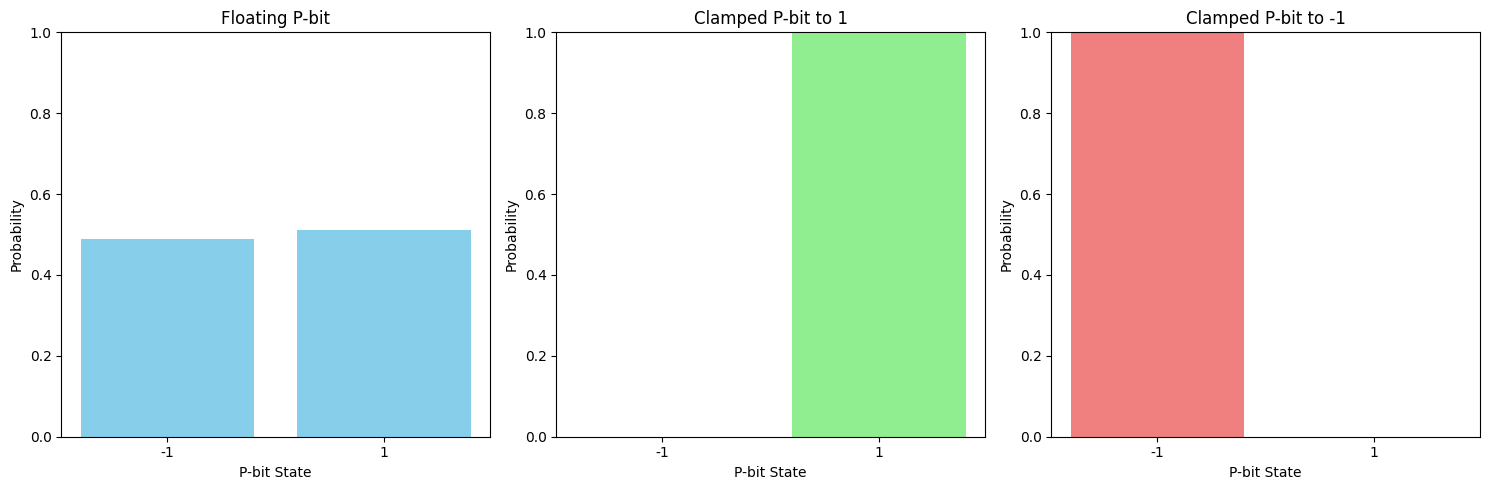

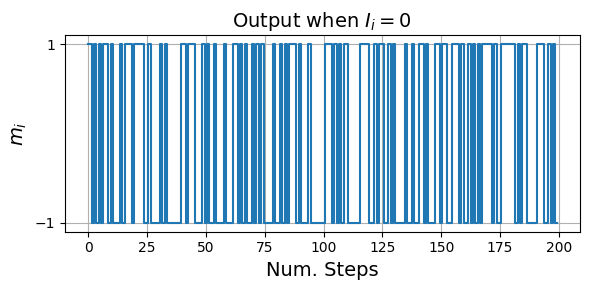

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os

def sign(x):
    return 1 if x > 0 else -1

# Function to simulate a single P-bit in floating or clamped state
def simulate_single_p_bit(num_steps=1000, I0=1.0, h = 0):
    # Single P-bit parameters (for simplicity, no interconnections as it's a single P-bit)

    J = np.array([0])  # No interconnections for a single P-bit
    
    # Initialize single P-bit (binary representation: 0 or 1)
    m = np.random.choice([-1, 1])

    # To convert binary m to bipolar {-1, 1}
    def binary_to_bipolar(x):
        return 2 * x - 1

    # Record outputs
    m_history = []

    for _ in range(num_steps):
        # bipolar_m = binary_to_bipolar(m)
        I_i = I0 * (h + np.dot(J, m))  # Update the P-bit input
        # Simulate random fluctuation
        random_value = np.random.uniform(-1, 1)  # Random value between -1 and 1
        activation_function = np.tanh(I_i)
        # print([I_i, activation_function,])
        m = sign(random_value + activation_function)  # Update P-bit based on Equation (1)

        m_history.append(m)

    return np.array(m_history)

# Function to plot the simulation results for floating and clamped states
def plot_single_p_bit_simulation(num_steps=1000):
    # Simulate for floating state (P-bit evolves freely)
    results_floating = simulate_single_p_bit(num_steps=num_steps)

    # Simulate for clamped state (P-bit fixed at 1)
    results_clamped_1 = simulate_single_p_bit(num_steps=num_steps, h=10)
    
    # Simulate for clamped state (P-bit fixed at 0)
    results_clamped_0 = simulate_single_p_bit(num_steps=num_steps, h=-10)
    
    # Create subplots for floating and clamped states
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot Floating State (Bar plot)
    axs[0].bar([0, 1], [np.sum(results_floating == -1) / num_steps, np.sum(results_floating == 1) / num_steps], color='skyblue')
    axs[0].set_title('Floating P-bit')
    axs[0].set_xlabel('P-bit State')
    axs[0].set_ylabel('Probability')
    axs[0].set_ylim([0, 1])
    axs[0].set_xticks([0, 1])
    axs[0].set_xticklabels(['-1', '1'], rotation=0)

    # Plot Clamped State (P-bit fixed at 1)
    axs[1].bar([0, 1], [np.sum(results_clamped_1 == -1) / num_steps, np.sum(results_clamped_1 == 1) / num_steps], color='lightgreen')
    axs[1].set_title('Clamped P-bit to 1')
    axs[1].set_xlabel('P-bit State')
    axs[1].set_ylabel('Probability')
    axs[1].set_ylim([0, 1])
    axs[1].set_xticks([0, 1])
    axs[1].set_xticklabels(['-1', '1'], rotation=0)

    # Plot Clamped State (P-bit fixed at 0)
    axs[2].bar([0, 1], [np.sum(results_clamped_0 == -1) / num_steps, np.sum(results_clamped_0 == 1) / num_steps], color='lightcoral')
    axs[2].set_title('Clamped P-bit to -1')
    axs[2].set_xlabel('P-bit State')
    axs[2].set_ylabel('Probability')
    axs[2].set_ylim([0, 1])
    axs[2].set_xticks([0, 1])
    axs[2].set_xticklabels(['-1', '1'], rotation=0)

    # Layout adjustments and display
    plt.tight_layout()
    plt.show()

    return results_floating

def time_averaged_m_i(num_steps=1000):
    # Simulate for floating state (P-bit evolves freely)
    results_floating = simulate_single_p_bit(num_steps=num_steps)

    plt.figure(figsize=(6, 3))
    plt.step(np.arange(0, 200),results_floating[0:200],where='mid')
    plt.xlabel('Num. Steps', fontsize=14)
    plt.ylabel('$m_i$', fontsize=14)
    plt.title('Output when $I_i=0$', fontsize=14)
    plt.yticks([-1,1])
    plt.grid()
    plt.tight_layout()
    # file_name = f"Floating_P_bit_PythonSim.png"
    # plt.savefig(os.path.join("Plots", file_name), dpi=300)
    plt.show()
    return

# Run the simulation and plot
results_floating = plot_single_p_bit_simulation(num_steps=1000)
time_averaged_m_i()

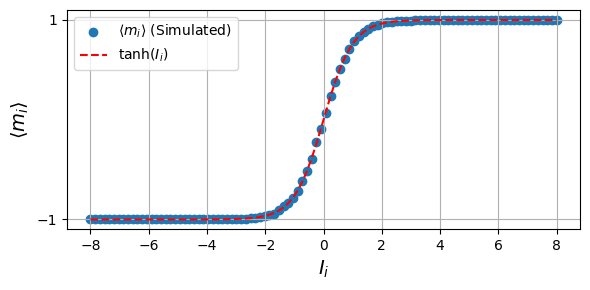

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define range of I_i values
I_values = np.linspace(-8, 8, 100)

num_samples = 10000  

# Function to compute <m_i>
def compute_mi_avg(I_i, num_samples=10000):
    rand_values = np.random.uniform(-1, 1, num_samples)  # Random values from U(-1,1)
    m_values = np.sign(rand_values + np.tanh(I_i))  # Compute m_i(t)
    return np.mean(m_values)  # Time-averaged m_i

# Compute <m_i> for each I_i
mi_avg_values = np.array([compute_mi_avg(I_i, num_samples) for I_i in I_values])

# Reference tanh(I_i)
tanh_values = np.tanh(I_values)  

# Plot
plt.figure(figsize=(6, 3))
plt.scatter(I_values, mi_avg_values, label='$⟨m_i⟩$ (Simulated)', marker='o')
plt.plot(I_values, tanh_values, label='tanh$(I_i)$', linestyle='dashed', color='red')
plt.xlabel('$I_i$', fontsize=14)
plt.ylabel('⟨$m_i$⟩', fontsize=14)
plt.title('Comparison of ⟨$m_i$⟩ with tanh($I_i$)', fontsize=14)
plt.yticks([-1,1])
plt.legend()
plt.grid()
plt.tight_layout()
# file_name = f"ActivationFunction_vs_output_PythonSim.png"
# plt.savefig(os.path.join("Plots", file_name), dpi=300)
plt.show()


# Binary implementation
Realize that now the thresholding function has changed to:
$$
 m =
   \left\{\begin{array}{lr}
       1, & \mathrm{Random}(0,1)<\mathrm{Tanh}(I) \\
       0, & \mathrm{Otherwise}
    \end{array}\right.
$$
This is due to both the random value and hyperbolic tangent being in the range of $[0,1]$ meaning they would near always be pushed to a 1 when added. 

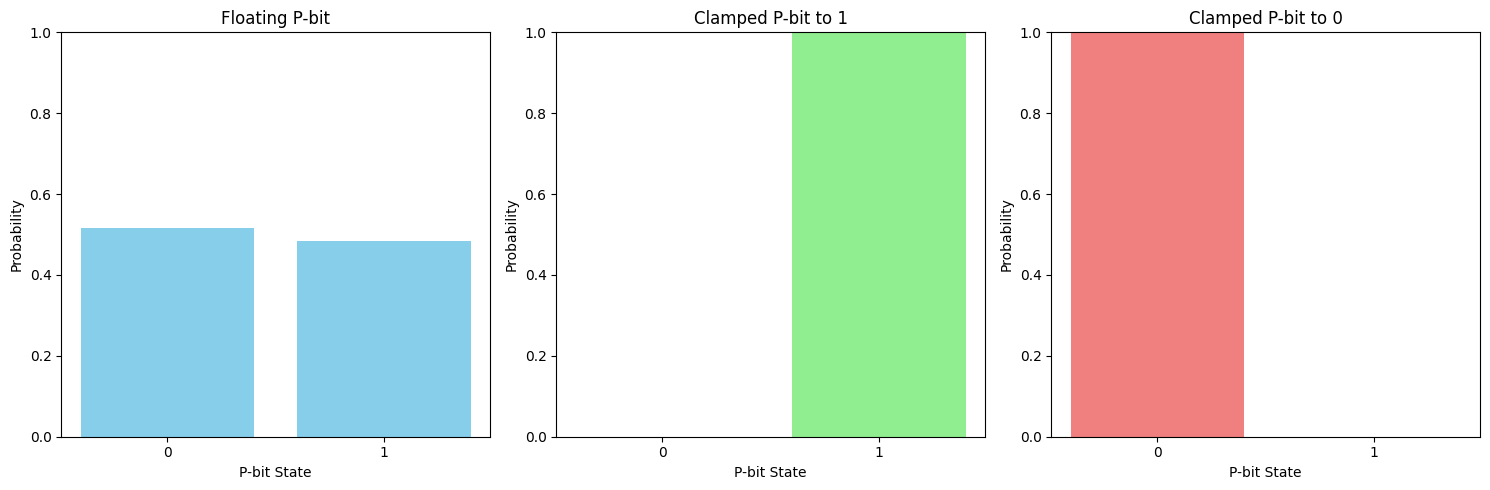

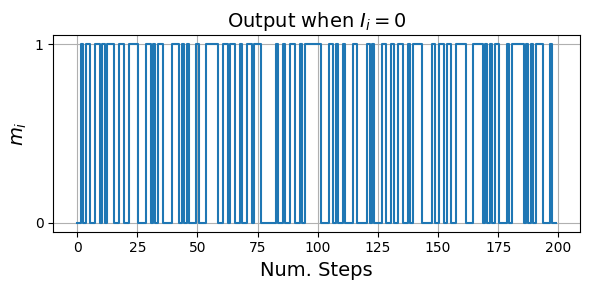

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os

def threshold(x, y):
    return 1 if x < y else 0 

# Function to simulate a single P-bit in floating or clamped state
def simulate_single_p_bit(num_steps=1000, I0=1.0, h = 0):
    # Single P-bit parameters (for simplicity, no interconnections as it's a single P-bit)

    J = np.array([0])  # No interconnections for a single P-bit
    
    # Initialize single P-bit (binary representation: 0 or 1)
    m = np.random.choice([0, 1])

    # Record outputs
    m_history = []

    for _ in range(num_steps):
        # bipolar_m = binary_to_bipolar(m)

        I_i = I0 * (h + np.dot(J, m))  # Update the P-bit input
        random_value = np.random.uniform(0, 1)  # Random value between -1 and 1
        activation_function = (np.tanh(I_i)+1)/2
        # print([I_i, activation_function, random_value])
        m = threshold(random_value, activation_function)
        m_history.append(m)

    return np.array(m_history)

# Function to plot the simulation results for floating and clamped states
def plot_single_p_bit_simulation(num_steps=1000):
    # Simulate for floating state (P-bit evolves freely)
    results_floating = simulate_single_p_bit(num_steps=num_steps)

    # Simulate for clamped state (P-bit fixed at 1)
    results_clamped_1 = simulate_single_p_bit(num_steps=num_steps, h=10)
    
    # Simulate for clamped state (P-bit fixed at 0)
    results_clamped_0 = simulate_single_p_bit(num_steps=num_steps, h=-10)
    
    # Create subplots for floating and clamped states
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot Floating State (Bar plot)
    axs[0].bar([0, 1], [np.sum(results_floating == 0) / num_steps, np.sum(results_floating == 1) / num_steps], color='skyblue')
    axs[0].set_title('Floating P-bit')
    axs[0].set_xlabel('P-bit State')
    axs[0].set_ylabel('Probability')
    axs[0].set_ylim([0, 1])
    axs[0].set_xticks([0, 1])
    axs[0].set_xticklabels(['0', '1'], rotation=0)

    # Plot Clamped State (P-bit fixed at 1)
    axs[1].bar([0, 1], [np.sum(results_clamped_1 == 0) / num_steps, np.sum(results_clamped_1 == 1) / num_steps], color='lightgreen')
    axs[1].set_title('Clamped P-bit to 1')
    axs[1].set_xlabel('P-bit State')
    axs[1].set_ylabel('Probability')
    axs[1].set_ylim([0, 1])
    axs[1].set_xticks([0, 1])
    axs[1].set_xticklabels(['0', '1'], rotation=0)

    # Plot Clamped State (P-bit fixed at 0)
    axs[2].bar([0, 1], [np.sum(results_clamped_0 == 0) / num_steps, np.sum(results_clamped_0 == 1) / num_steps], color='lightcoral')
    axs[2].set_title('Clamped P-bit to 0')
    axs[2].set_xlabel('P-bit State')
    axs[2].set_ylabel('Probability')
    axs[2].set_ylim([0, 1])
    axs[2].set_xticks([0, 1])
    axs[2].set_xticklabels(['0', '1'], rotation=0)

    # Layout adjustments and display
    plt.tight_layout()
    plt.show()

    return results_floating

def time_averaged_m_i(num_steps=1000):
    # Simulate for floating state (P-bit evolves freely)
    results_floating = simulate_single_p_bit(num_steps=num_steps)

    plt.figure(figsize=(6, 3))
    plt.step(np.arange(0, 200),results_floating[0:200],where='mid')
    plt.xlabel('Num. Steps', fontsize=14)
    plt.ylabel('$m_i$', fontsize=14)
    plt.title('Output when $I_i=0$', fontsize=14)
    plt.yticks([0,1])
    plt.grid()
    plt.tight_layout()
    # file_name = f"Floating_P_bit_PythonSim.png"
    # plt.savefig(os.path.join("Plots", file_name), dpi=300)
    plt.show()
    return

# Run the simulation and plot
results_floating = plot_single_p_bit_simulation(num_steps=1000)
time_averaged_m_i()